In [114]:
from sklearn import model_selection, metrics
import numpy as np
import pandas as pd

df = pd.read_csv("./heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Linear Regression

Now that we have conducted a basic analysis of the data set and found the quantitative variable with the greatest correlation to the target variable, we can build a model using it to predict the likelihood of heart disease. We will use the *ST slope* variable from the data set because that had the greatest individual correlation with the target variable, 0.5056079709572009.

**Note**: The column titled *target* is the ground truth value detailing whether a patient actually was diagnosed with heart disease or not.  

In [115]:
from sklearn.linear_model import LinearRegression

# Model for determining heart disease with ST slope
linr = LinearRegression()

X = np.array(df.loc[:, 'ST slope']).reshape(-1, 1)
Y = np.array(df.loc[:, 'target'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3)

linr.fit(x_train, y_train)
linr_test_pred = linr.predict(x_test)
print(f"The score of the model is: {linr.score(x_test, y_test)}")

The score of the model is: 0.24414081897483608


### Results

The score of the model ranges between 0.2 to 0.3.  Thus, Linear Regression is not a good model choice for this data set and further analysis is required.

In [116]:
x2 = df.loc[:, 'age':'ST slope']
y2 = df.loc[:, 'target']
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x2, y2, test_size=0.3)

## Logistic Regression

For all succeeding models, I will use all variable types as inputs into, excluding the target variable.

In [117]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)

lr.fit(xtrain, ytrain)

lr_test_pred = lr.predict(xtest)

## Gaussian Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(xtrain, ytrain)

nb_test_pred = nb.predict(xtest)

## Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(xtrain, ytrain)

dt_test_pred = dt.predict(xtest)

# Additional reporting for the most important variable in the decision tree:
print(f"The most important variable used in the Decision Tree for this split was {pd.Series(dt.feature_importances_, df.columns[0:len(df.columns)-1]).idxmax()}")

The most important variable used in the Decision Tree for this split was ST slope


# Neural Network

In [120]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(learning_rate='adaptive', max_iter=1000)

nn.fit(xtrain, ytrain)

nn_test_pred = nn.predict(xtest)

## Cross-Model Comparisons and Results

Below, I display the results of all used models and compare their performances to determine which one is consistently the best performing one.

Based on the below chart and tables, it appears the Decision tree consistently performs the best for this dataset.

In [121]:
print("############################################# LOGISTIC REGRESSION #############################################")
print(f"Accuracy for Logistic Regression was: {metrics.accuracy_score(ytest, lr_test_pred)}")
print(f"The Confusion matrix for Logistic Regression is:\n {metrics.confusion_matrix(ytest, lr_test_pred)}")
print(f"The Classification report for Logistic Regression is:\n {metrics.classification_report(ytest, lr_test_pred)}")

print("############################################# GAUSSIAN NAIVE BAYES #############################################")
print(f"Accuracy for Gaussian Naive Bayes: {metrics.accuracy_score(ytest, nb_test_pred)}")
print(f"Confusion Matrix for Gaussian Naive Bayes:\n {metrics.confusion_matrix(ytest, nb_test_pred)}")
print(f"Classification Report for Gaussian Naive Bayes:\n {metrics.classification_report(ytest, nb_test_pred)}")

print("############################################# DECISION TREE CLASSIFIER #############################################")
print(f"Accuracy for Decision Tree Classifier: {metrics.accuracy_score(ytest, dt_test_pred)}")
print(f"Confusion Matrix for Decision Tree Classifier:\n {metrics.confusion_matrix(ytest, dt_test_pred)}")
print(f"Classification Report for Decision Tree Classifier:\n {metrics.classification_report(ytest, dt_test_pred)}")

print("############################################# NEURAL NETWORK CLASSIFIER #############################################")
print(f"Accuracy for Neural Network Classifier: {metrics.accuracy_score(ytest, nn_test_pred)}")
print(f"Confusion Matrix for Neural Network Classifier:\n {metrics.confusion_matrix(ytest, nn_test_pred)}")
print(f"Classification Report for Neural Network Classifier:\n {metrics.classification_report(ytest, nn_test_pred)}")

############################################# LOGISTIC REGRESSION #############################################
Accuracy for Logistic Regression was: 0.8403361344537815
The Confusion matrix for Logistic Regression is:
 [[134  32]
 [ 25 166]]
The Classification report for Logistic Regression is:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       166
           1       0.84      0.87      0.85       191

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357

############################################# GAUSSIAN NAIVE BAYES #############################################
Accuracy for Gaussian Naive Bayes: 0.8543417366946778
Confusion Matrix for Gaussian Naive Bayes:
 [[141  25]
 [ 27 164]]
Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.84      0.85     

In [122]:
# Model Comparisons
mean_scores = []

scores_dict = {'Logistic Regression': [], 'Naive Bayes': [], 'Decision Tree': [], 'Neural Network': []}
num_iter = 100
for iteration in range(num_iter):
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x2, y2, test_size=0.3)

    # Fit model with new split
    lr.fit(xtrain, ytrain)
    nb.fit(xtrain, ytrain)
    dt.fit(xtrain, ytrain)
    nn.fit(xtrain, ytrain)

    # Get prediction for current split
    lr_pred = lr.predict(xtest)
    nb_pred = nb.predict(xtest)
    dt_pred = dt.predict(xtest)
    nn_pred = nn.predict(xtest)

    scores_dict['Logistic Regression'].append(metrics.accuracy_score(ytest, lr_pred))
    scores_dict['Naive Bayes'].append(metrics.accuracy_score(ytest, nb_pred))
    scores_dict['Decision Tree'].append(metrics.accuracy_score(ytest, dt_pred))
    scores_dict['Neural Network'].append(metrics.accuracy_score(ytest, nn_pred))

The model with the highest average accuracy is the Decision Tree with an accuracy of 86.68907563025212%


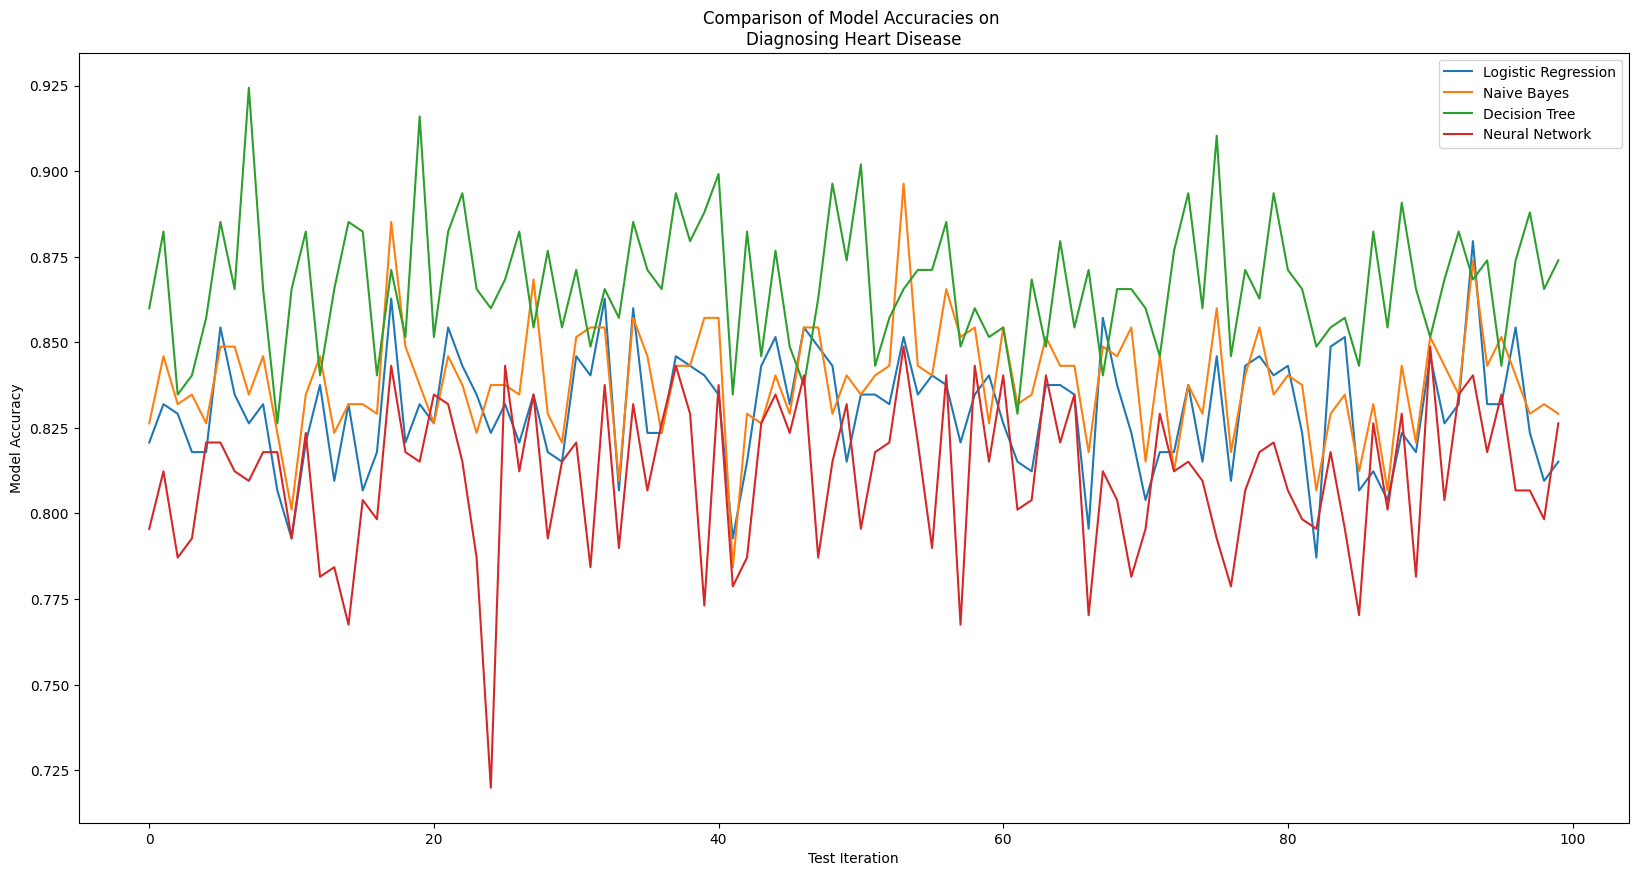

In [124]:
import matplotlib.pyplot as plt

avg_accuracies = {'Logistic Regression': np.mean(scores_dict['Logistic Regression']),
                  'Naive Bayes': np.mean(scores_dict['Naive Bayes']),
                  'Decision Tree': np.mean(scores_dict['Decision Tree']),
                  'Neural Network': np.mean(scores_dict['Neural Network'])}

print(f"The model with the highest average accuracy is the {[x for x in avg_accuracies.keys() if avg_accuracies[x] == max(avg_accuracies.values())].pop(0)} with an accuracy of {100 * max(avg_accuracies.values())}%")

plt.figure(figsize=(20, 10))
plt.plot(scores_dict['Logistic Regression'], label="Logistic Regression")
plt.plot(scores_dict['Naive Bayes'], label='Naive Bayes')
plt.plot(scores_dict['Decision Tree'], label='Decision Tree')
plt.plot(scores_dict['Neural Network'], label='Neural Network')
plt.xlabel("Test Iteration")
plt.ylabel("Model Accuracy")
plt.title("Comparison of Model Accuracies on \nDiagnosing Heart Disease")
plt.legend()
plt.show()